In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
breast = load_breast_cancer()
breast_data = breast.data
print("Shape of x(data) i.e. (m,n) :", breast_data.shape)
breast_labels = breast.target
print("Shape of y(labels) :", breast_labels.shape)

Shape of x(data) i.e. (m,n) : (569, 30)
Shape of y(labels) : (569,)


Concatenate breast_labels with breast_data to create a DataFrame which will have both data and labels

In [3]:
labels = np.reshape(breast_labels, (569, 1))
print("Shape of y(labels) after reshaping :", labels.shape)

final_breast_data = np.concatenate([breast_data, labels], axis=1)

# Creating the dataframe of the final data to represent the data in a tabular fashion
breast_dataset = pd.DataFrame(final_breast_data)
# print(breast_dataset)

features = breast.feature_names
print(features.shape)
# print(features)

Shape of y(labels) after reshaping : (569, 1)
(30,)


Adding label field to the features array since we will be equating this array with the coloumn names of our breast_dataset dataframe

In [4]:
feature_labels = np.append(features, 'label')
# print(feature_labels)
print(feature_labels.shape)

(31,)


Embedding the column names to the breast_dataset dataframe

In [5]:
breast_dataset.columns = feature_labels
# print(breast_dataset)
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [6]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

 Standardizing the data since PCA's output is influenced based on th scale of the features of the data

In [7]:
x = breast_dataset.loc[:, features].values
#normalizing the features
x = StandardScaler().fit_transform(x)
print(f'Mean {np.mean(x)}, Standard Deviation {np.std(x)}')

Mean -6.826538293184326e-17, Standard Deviation 1.0


Convert the normalized features into a tabular format with the help of DataFrame

In [8]:
feat_cols = ['feature' + str(i) for i in range(x.shape[1])]
normalized_breast_dataset = pd.DataFrame(x, columns=feat_cols)
normalized_breast_dataset.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


Scikit-Learn's PCA class implements PCA using SVD(Singular Value Decomposition) 

Following code applies PCA to reduce the dimensionality of the dataset down to two dimensions.

In [9]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

Creating a DataFrame that will have the principal component values for all 569 samples.

In [10]:
principal_breast_DF = pd.DataFrame(
    data=principalComponents_breast,
    columns=['Principal component 1', 'Principal component 2'])
principal_breast_DF.tail()

,Principal component 1,Principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [11]:
pca_breast.explained_variance_ratio_

array([0.44272026, 0.18971182])

As seen above while projecting 30-dimensional data to a 2-dimensional data 36.8% imformation is lost

Visualization of the data

<Figure size 432x288 with 0 Axes>

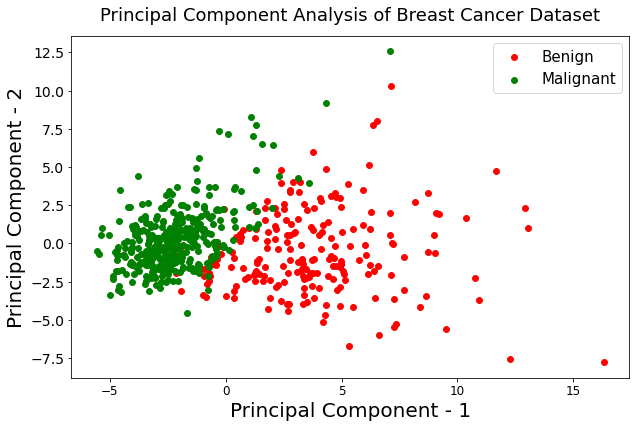

In [26]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=18, pad=15)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_DF.loc[indicesToKeep, 'Principal component 1']
               , principal_breast_DF.loc[indicesToKeep, 'Principal component 2'], c = color, s = 35)

plt.legend(targets,prop={'size': 15})
plt.subplots_adjust(top=0.60)
plt.savefig('fig.png')